# Parsing text into words and converting into tokens

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple

In [ ]:
# the text
text = [ 'All that we are is the result of what we have thought',
         'To be or not to be that is the question',
         'Be yourself everyone else is already taken' ]

text[0]

'All that we are is the result of what we have thought'

In [ ]:
allwords = re.split(r'\s',text[0])
vocab = sorted(set(allwords))
vocab

['All',
 'are',
 'have',
 'is',
 'of',
 'result',
 'that',
 'the',
 'thought',
 'we',
 'what']

In [ ]:
word2idx = {text.lower(): idx for idx, text in enumerate(vocab)}
word2idx

{'all': 0,
 'are': 1,
 'have': 2,
 'is': 3,
 'of': 4,
 'result': 5,
 'that': 6,
 'the': 7,
 'thought': 8,
 'we': 9,
 'what': 10}

In [ ]:
idx2word = {idx: text.lower() for idx, text in enumerate(vocab)}
idx2word

{0: 'all',
 1: 'are',
 2: 'have',
 3: 'is',
 4: 'of',
 5: 'result',
 6: 'that',
 7: 'the',
 8: 'thought',
 9: 'we',
 10: 'what'}

# Create functiona to encoder/ decoder

In [ ]:
def encoder(sentence: str)->Tuple[list, Dict]:

  pattern = r"[A-Za-z0-9_]+(?:['’][A-Za-z0-9_]+)*"
  allwords = re.findall(pattern, sentence)

  vocab = sorted(set(allwords))

  word2idx = {text.lower():idx for idx, text in enumerate(vocab)}

  encoded_sentnece = [word2idx[word.lower()] for word in allwords]

  idx2word = {idx: text.lower() for idx, text in enumerate(vocab)}

  return encoded_sentnece, word2idx, idx2word

def decoder(encoded_sentence: list, vocab_dict: Dict = None)->str:

  decoded_sentence = [vocab_dict[idx] for idx in encoded_sentence]

  return " ".join(decoded_sentence)

In [108]:
text = [ 'All that we are is the result of what we have thought',
         'To be or not to be that is the question',
         'Be yourself everyone else is already taken' ]

vector, word2idx, idx2word = encoder(text[2].lower())

decoded_sentence = decoder(vector, idx2word)

print(decoded_sentence)

be yourself everyone else is already taken


In [ ]:
encoded_sentence, _, idx2word = encoder(text[0])
decoded_sentence = decoder(encoded_sentence, idx2word)
print(decoded_sentence)

all that we are is the result of what we have thought


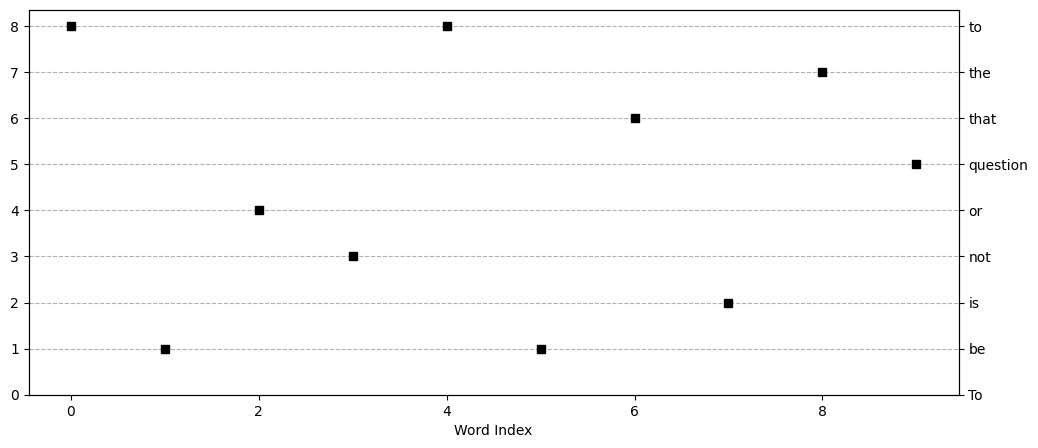

In [ ]:
# Create a plot
fig, ax = plt.subplots(1,figsize=(12,5))

sentence = text[1]

allwords = sentence.split()
vocab = sorted(set(allwords))

tokens = encoder(sentence)[0]

# Plot the tokens
ax.plot(tokens, 'ks')
ax.set(xlabel='Word Index', yticks=range(len(vocab)))
ax.grid(linestyle="--", axis="y")

# Invisible axis for right-hand side labels (secondary axis)
ax2 = ax.twinx()
ax2.plot(tokens, alpha=0)
ax2.set(yticks=range(len(vocab)))
ax2.set_yticklabels(vocab)
ax2.grid(False)

plt.show();

In [ ]:
# Find the occurrences of a word in a sentence

def context_window(sentence: str, targetword: str, window_size: int = 1)->list:

  allwords = re.findall(r"\b\w+\b", sentence)

  assert window_size > 0, f"Window size must be greater than 0"

  context_list = []

  word_locs = [i for i, w in enumerate(allwords) if w.lower() == targetword.lower()]

  for idx in word_locs:

    context_words = allwords[max(0, idx-window_size):min(idx+window_size+1, len(allwords))]

    context_list.append({idx:" ".join(context_words)})

  return context_list


In [ ]:
sentence = "Nory was a Catholic because her mother was a Catholic, and Nory’s mother was a Catholic because her father was a Catholic, and her father was a Catholic because his mother was a Catholic, or had been."

targetword = "Catholic"
# sentence = text[0]

context_list = context_window(sentence, targetword, window_size=2)

if len(context_list) == 0:
  print(f"No context words found for \"{targetword}\" in the sentence")
else:
  for i in context_list:
    for k, v in i.items():
      print(f"Position: {k}, Context: \"{v}\"")

Position: 3, Context: "was a Catholic because her"
Position: 9, Context: "was a Catholic and Nory"
Position: 16, Context: "was a Catholic because her"
Position: 22, Context: "was a Catholic and her"
Position: 28, Context: "was a Catholic because his"
Position: 34, Context: "was a Catholic or had"


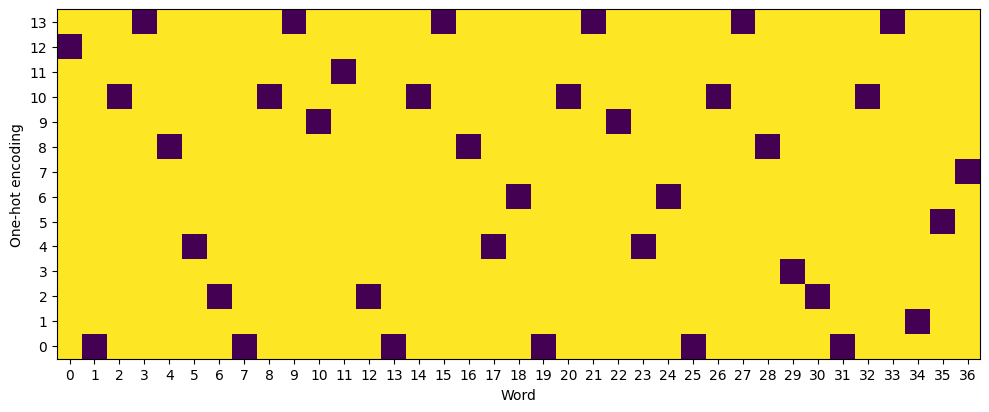

In [144]:
sentence = "Nory was a Catholic because her mother was a Catholic, and Nory’s mother was a Catholic because her father was a Catholic, and her father was a Catholic because his mother was a Catholic, or had been."

pattern = r"[A-Za-z0-9_]+(?:['’][A-Za-z0-9_]+)*"
allwords = re.findall(pattern, sentence)

vocab = sorted(set(allwords))

word2idx = encoder(sentence)[1]

word_matrix = np.zeros((len(allwords), len(vocab)))

for idx, word in enumerate(allwords):
  word_matrix[idx, word2idx[word.lower()]] = 1

word_matrix_df = pd.DataFrame(word_matrix, columns=vocab)

# print(word_matrix_df)

fig, ax = plt.subplots(1,figsize=(10,10))

ax.imshow(1-word_matrix_df.T)

n = word_matrix_df.T.shape[0]
positions = np.arange(n)
labels = positions[::-1]

ax.set_xlabel("Word")
ax.set_ylabel("One-hot encoding")
ax.set_xticks(range(len(allwords)))

ax.set_yticks(positions)
ax.set_yticklabels(labels)


plt.tight_layout()
plt.show();

37


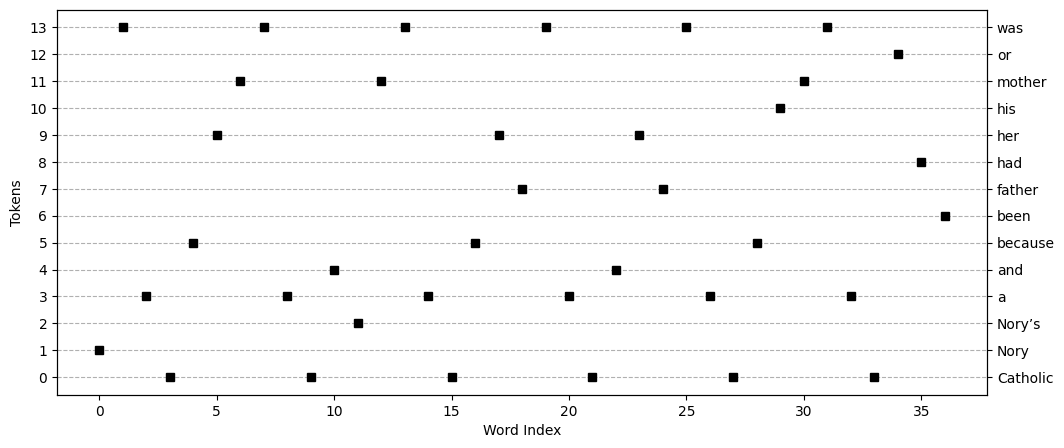

In [ ]:
# Plot the image of one-hot encoding matrix

# Create a plot
fig, ax = plt.subplots(1,figsize=(12,5))

sentence = "Nory was a Catholic because her mother was a Catholic, and Nory’s mother was a Catholic because her father was a Catholic, and her father was a Catholic because his mother was a Catholic, or had been."


pattern = r"[A-Za-z0-9_]+(?:['’][A-Za-z0-9_]+)*"
allwords = re.findall(pattern, sentence)
vocab = sorted(set(allwords))

tokens = encoder(sentence)[0]

# Plot the tokens
ax.plot(tokens, 'ks')
ax.set(xlabel='Word Index', ylabel='Tokens', yticks=range(len(vocab)))
ax.grid(linestyle="--", axis="y")

# Invisible axis for right-hand side labels (secondary axis)
ax2 = ax.twinx()
ax2.plot(tokens, alpha=0)
ax2.set(yticks=range(len(vocab)))
ax2.set_yticklabels(vocab)
ax2.grid(False)

plt.show();
